# Prelucrarea Semnalelor
## Laborator 6
### Miu Elena Adania
### Grupa 333

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
import sounddevice

In [11]:
from scipy import datasets

## Ex1
### Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.

* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$

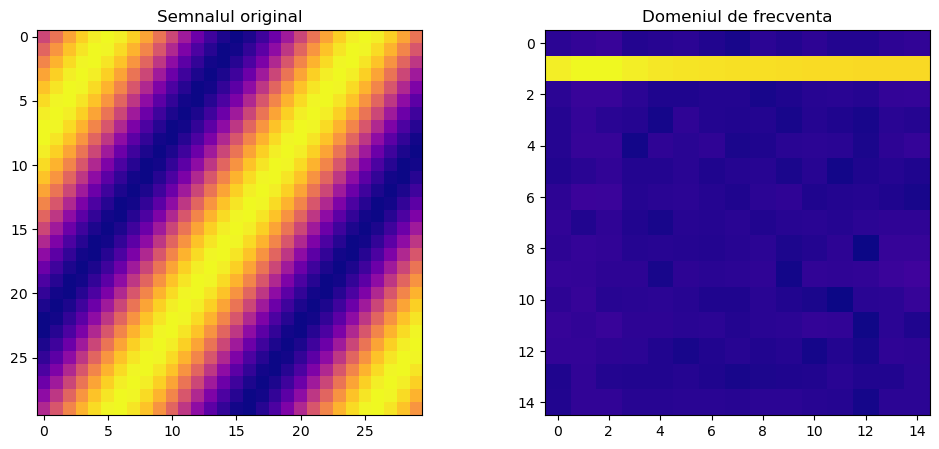

In [12]:
n1, n2 = np.mgrid[0:1:1/30, 0:1:1/30]

y = np.sin(2 * np.pi * n1 + 3 * np.pi * n2)
Y = np.fft.fft2(y)
Y = Y[:Y.shape[0]//2, :Y.shape[1]//2]
Y_scaled = 20 * np.log10(np.abs(Y) + np.finfo(float).eps)

figure, axis = plt.subplots(1, 2, figsize=(12, 5))
axis[0].imshow(y, cmap='plasma')
axis[0].set_title("Semnalul original")
axis[1].imshow(Y_scaled, cmap='plasma')
axis[1].set_title("Domeniul de frecventa")
plt.show()

* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$

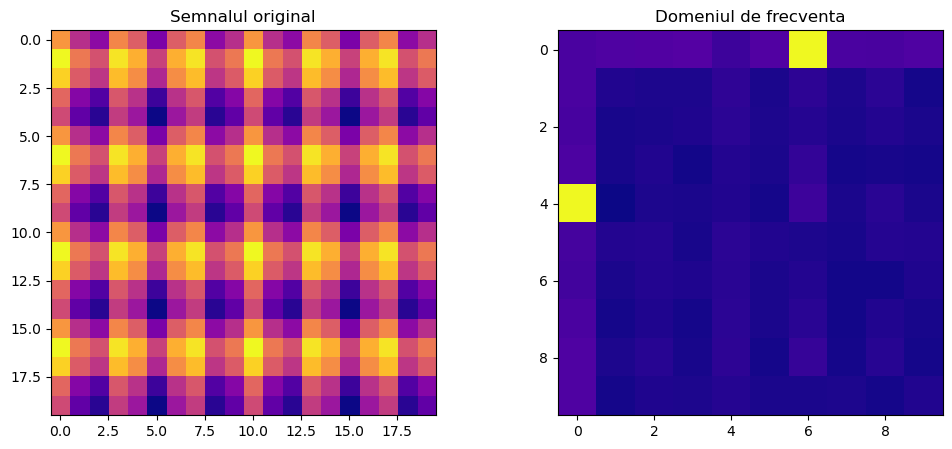

In [13]:
n1, n2 = np.mgrid[0:2:1/10, 0:2:1/10]

y = np.sin(4 * np.pi * n1) + np.cos(6 * np.pi * n2)
Y = np.fft.fft2(y)
Y = Y[:Y.shape[0]//2, :Y.shape[1]//2]
Y_scaled = 20 * np.log10(np.abs(Y) + np.finfo(float).eps)

figure, axis = plt.subplots(1, 2, figsize=(12, 5))
axis[0].imshow(y, cmap='plasma')
axis[0].set_title("Semnalul original")
axis[1].imshow(Y_scaled, cmap='plasma')
axis[1].set_title("Domeniul de frecventa")
plt.show()

* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

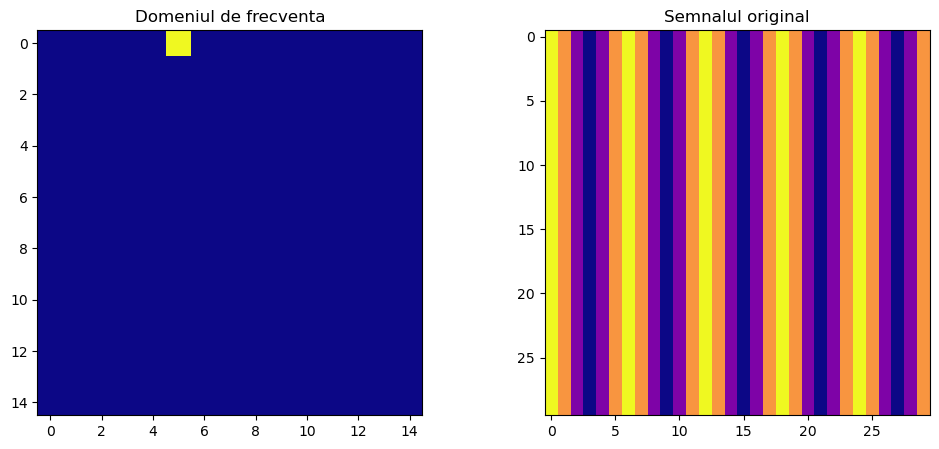

In [14]:
n1, n2 = np.mgrid[0:30:1, 0:30:1]

Y = np.where((n1 == 0) & ((n2 == 5) | (n2 == 25)), 1, 0)
y = np.fft.fft2(Y).real
Y = Y[:Y.shape[0]//2, :Y.shape[1]//2]

figure, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].imshow(Y, cmap='plasma')
axis[0].set_title("Domeniul de frecventa")
axis[1].imshow(y, cmap='plasma')
axis[1].set_title("Semnalul original")

plt.show()

* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

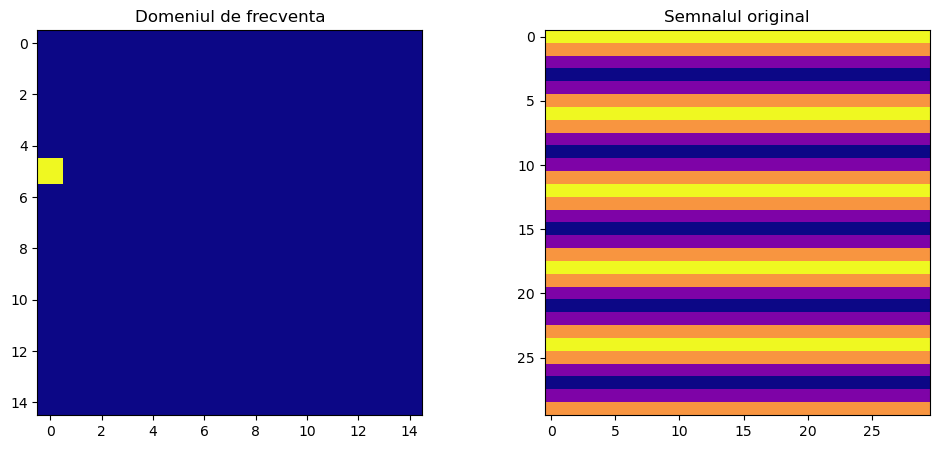

In [15]:
n1, n2 = np.mgrid[0:30:1, 0:30:1]

Y = np.where((n2 == 0) & ((n1 == 5) | (n1 == 25)), 1, 0)
y = np.fft.fft2(Y).real
Y = Y[:Y.shape[0]//2, :Y.shape[1]//2]

figure, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].imshow(Y, cmap='plasma')
axis[0].set_title("Domeniul de frecventa")
axis[1].imshow(y, cmap='plasma')
axis[1].set_title("Semnalul original")

plt.show()

* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

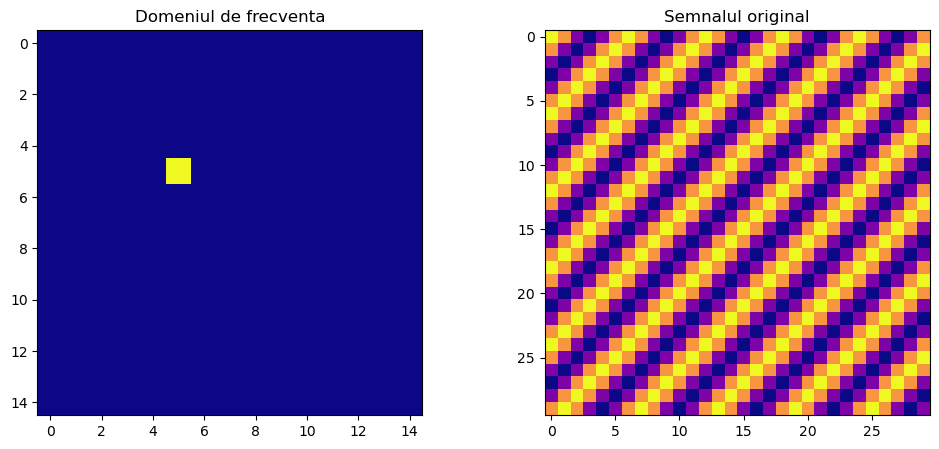

In [16]:
n1, n2 = np.mgrid[0:30:1, 0:30:1]

Y = np.where(((n1 == 5) & (n2 == 5)) | ((n1 == 25) & (n2 == 25)), 1, 0)
y = np.fft.fft2(Y).real
Y = Y[:Y.shape[0]//2, :Y.shape[1]//2]

figure, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].imshow(Y, cmap='plasma')
axis[0].set_title("Domeniul de frecventa")
axis[1].imshow(y, cmap='plasma')
axis[1].set_title("Semnalul original")

plt.show()

## Ex2
### Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

In [17]:
def peak_signal_to_noise(signal, noise):
    
    # mean squared error
    mse = np.mean((signal - noise) ** 2)  
    if mse == 0:
        return np.inf  # this means the signals are the same, and don't have any noise
    
    # find the pixel wth highest intensity in the original image
    max_pixel = np.max(signal)
    
    pstn_ratio = 10 * np.log10((max_pixel ** 2) / mse)
    
    return pstn_ratio

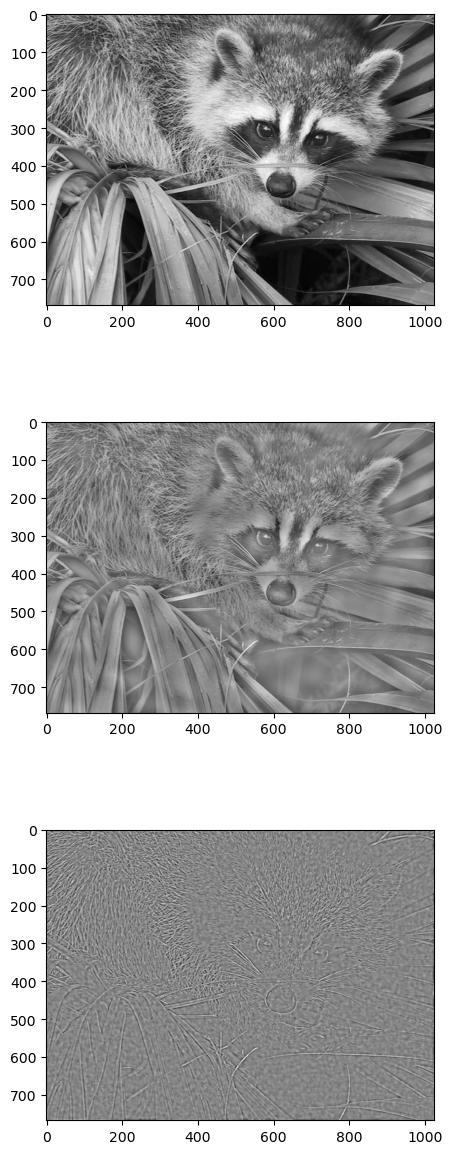

In [18]:
figure, axis = plt.subplots(3, 1, figsize=(5, 15))

X = datasets.face(gray=True)
axis[0].imshow(X, cmap=plt.cm.gray)

Y = np.fft.rfft2(X)
Y_scaled = 20 * np.log10(np.abs(Y))

threshold1 = 120
Y1 = Y.copy()
Y1[Y_scaled > threshold1] = 0
noise1 = np.fft.irfft2(Y1)
psnr1 = peak_signal_to_noise(X, noise1)

axis[1].imshow(noise1, cmap=plt.cm.gray)

threshold2 = 100
Y2 = Y.copy()
Y2[Y_scaled > threshold2] = 0
noise2 = np.fft.irfft2(Y2)
psnr2 = peak_signal_to_noise(X, noise2)

axis[2].imshow(noise2, cmap=plt.cm.gray)

plt.show()